In [17]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, get_ADX, adx_mult_tickers, plot_function

In [18]:
# Function Call for Multiple Tickers
mult_tick_list = ['AAPL', 'GOOG']
start_date = '2022-01-01'
stock_data2 = import_stock_data(mult_tick_list, start_date)
#print(stock_data2.tail())
adx_df = adx_mult_tickers(stock_data2, mult_tick_list)
print(adx_df.tail())

[*********************100%%**********************]  2 of 2 completed


          AAPL       GOOG
582  20.160602  30.611187
583  19.726139  28.806485
584  18.387662  27.242409
585  17.874926  25.886878
586  23.613241  24.876474


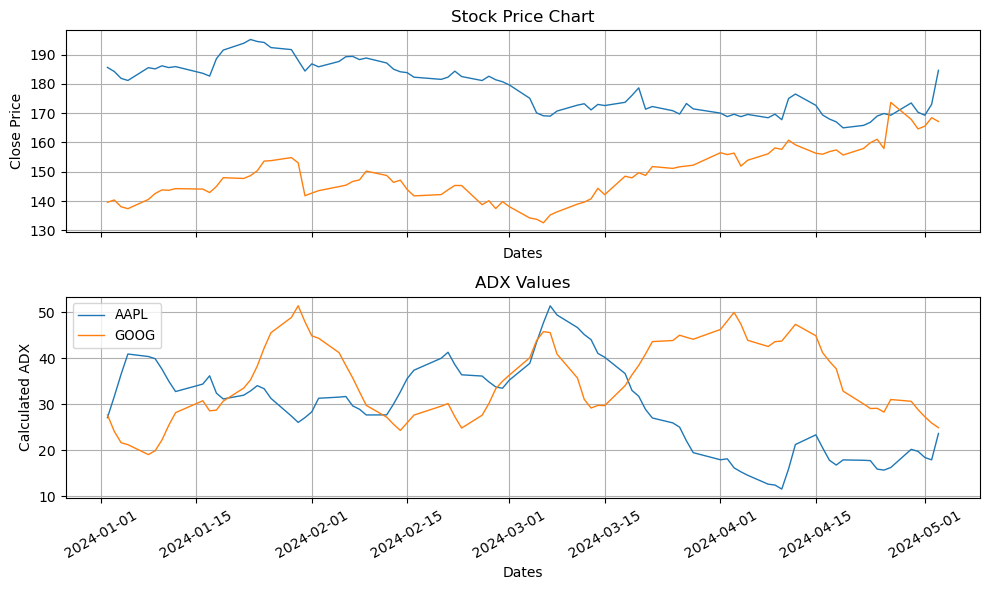

In [19]:
### Plot ADX
plot = plot_function(stock_data2, adx_df, tickers = mult_tick_list, indicator_type = 'ADX')
plot


In [23]:
### Apply Filtering Fuction
# Define thresholds for ADX
adx_buy_threshold = 25  # Example threshold for strong uptrend
adx_sell_threshold = 20  # Example threshold for strong downtrend
tickers = mult_tick_list

# Filter based on indicator values
def filtering(df, tickers, buy_threshold, sell_threshold):
    for t in tickers:
        if df[t].iloc[-1] > buy_threshold:
            df[f"{t}_Signal"] = 'BUY'
        elif df[t].iloc[-1] < sell_threshold:
            df[f"{t}_Signal"] = 'SELL'
        else:
            df[f"{t}_Signal"] = 'HOLD'

adx_df

,AAPL,GOOG,AAPL_Signal,GOOG_Signal
0,NaN,NaN,HOLD,HOLD
1,100.000000,100.000000,HOLD,HOLD
2,97.864554,87.270831,HOLD,HOLD
3,96.901059,75.899860,HOLD,HOLD
4,96.176896,67.149069,HOLD,HOLD
...,...,...,...,...
582,20.160602,30.611187,HOLD,HOLD
583,19.726139,28.806485,HOLD,HOLD
584,18.387662,27.242409,HOLD,HOLD
585,17.874926,25.886878,HOLD,HOLD
